# Generic Select

Bloqs for applying SELECT unitary for LCU of Pauli Strings.

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SelectPauliLCU`
A SELECT bloq for selecting and applying operators from an array of `PauliString`s.

$$
\mathrm{SELECT} = \sum_{l}|l \rangle \langle l| \otimes U_l
$$

Where $U_l$ is a member of the Pauli group.

This bloq uses the unary iteration scheme to apply `select_unitaries[selection]` to `target`
controlled on the single-bit `control` register.

#### Parameters
 - `selection_bitsize`: The size of the indexing `select` register. This should be at least `log2(len(select_unitaries))`
 - `target_bitsize`: The size of the `target` register.
 - `select_unitaries`: List of `DensePauliString`s to apply to the `target` register. Each dense pauli string must contain `target_bitsize` terms.
 - `control_val`: Optional control value. If specified, a singly controlled gate is constructed.


In [2]:
from qualtran.bloqs.multiplexers.select_pauli_lcu import SelectPauliLCU

### Example Instances

In [3]:
target_bitsize = 4
us = ['XIXI', 'YIYI', 'ZZZZ', 'ZXYZ']
us = [cirq.DensePauliString(u) for u in us]
selection_bitsize = int(np.ceil(np.log2(len(us))))
select_pauli_lcu = SelectPauliLCU(selection_bitsize, target_bitsize, select_unitaries=us)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([select_pauli_lcu],
           ['`select_pauli_lcu`'])

### Call Graph

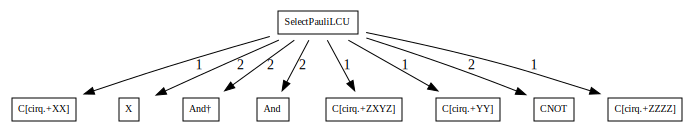

#### Counts totals:
 - `And`: 2
 - `And†`: 2
 - `CNOT`: 2
 - `C[cirq.+XX]`: 1
 - `C[cirq.+YY]`: 1
 - `C[cirq.+ZXYZ]`: 1
 - `C[cirq.+ZZZZ]`: 1
 - `X`: 2

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
select_pauli_lcu_g, select_pauli_lcu_sigma = select_pauli_lcu.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(select_pauli_lcu_g)
show_counts_sigma(select_pauli_lcu_sigma)